<h2 style="text-align:center;">Data Augmentation — Enhancing Image Diversity for CNNs</h2>

**Author:** Mubasshir Ahmed  
**Module:** Deep Learning — FSDS  
**Notebook:** 07_Data_Augmentation_in_CNN  
**Objective:** Learn why and how to augment image data for CNN training. Visualize different augmentation strategies (mild, moderate, aggressive) and see how to apply augmentation on-the-fly during training.


### 1️⃣ Why Data Augmentation?

- Deep learning models perform better with more diverse data. When dataset size is small, models tend to **overfit** (memorize training samples).
- **Data augmentation** synthetically increases dataset variation by applying transformations such as rotation, shift, zoom, shear, and flip.
- Augmentation is different from generative models (GANs): augmentation **modifies** existing images; GANs **create** new ones.
- Best practice for training: perform augmentation **on-the-fly** (in memory) using `ImageDataGenerator`. This avoids extra disk usage and provides new random transforms each epoch.

**Analogy:** Showing the same face under slightly different angles, lighting, and zooms — the model learns the identity/label, not the exact pixels.


In [1]:
# 2️⃣ Imports & Paths (Windows-safe)
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# ➤ Dataset demo folders (assumes notebook is inside 06_Data_Augmentation folder)
base_dir = os.getcwd()
example_dir = os.path.join(base_dir, 'example_image')
generated_dir = os.path.join(base_dir, 'generated_samples')
os.makedirs(generated_dir, exist_ok=True)

print("# ➤ base_dir:", base_dir)
print("# ➤ example_dir exists:", os.path.exists(example_dir))
print("# ➤ generated_dir exists:", os.path.exists(generated_dir))

# ➤ base_dir: c:\Users\MUBASSHIR\OneDrive\Desktop\FSDS_TASKS\Deep_Learning\03_CNN\06_Data_Augmentation
# ➤ example_dir exists: True
# ➤ generated_dir exists: True


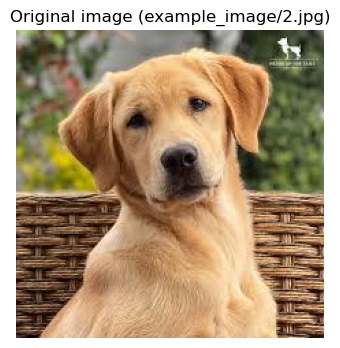

In [2]:
# 3️⃣ Display the original sample image
img_path = os.path.join(example_dir, '2.jpg')
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Sample image not found at {img_path}. Put a demo image at example_image/2.jpg")
img = load_img(img_path)
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title('Original image (example_image/2.jpg)')
plt.axis('off')
plt.show()

### 4️⃣ Augmentation Pipelines — mild, moderate, aggressive

We'll create three pipelines to demonstrate the effect of different augmentation intensities:

- **Mild** — safe for faces (recommended): small rotations, small shifts, small zooms.  
- **Moderate** — more variety suitable for general objects.  
- **Aggressive** — large transforms (for demonstration; may distort faces).

Below is a reference for typical parameter ranges:

| Parameter | Meaning | Mild (faces) | Moderate | Aggressive |
|-----------|---------|--------------:|---------:|-----------:|
| rotation_range | degrees | 0–15 | 15–30 | 30–60 |
| width/height shift | fraction of width/height | 0–0.1 | 0.1–0.25 | 0.25–0.5 |
| zoom_range | fraction | 0–0.1 | 0.1–0.3 | 0.3–0.6 |
| shear_range | shear intensity | 0–0.1 | 0.1–0.3 | 0.3–0.6 |
| horizontal_flip | mirror image | often True | True | True |
| brightness_range | brightness variation | (0.9,1.1) | (0.8,1.2) | (0.6,1.4) |



In [3]:
# 5️⃣ Define ImageDataGenerator pipelines
mild_datagen = ImageDataGenerator(
    rotation_range=12,
    width_shift_range=0.08,
    height_shift_range=0.08,
    zoom_range=0.08,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

moderate_datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

aggressive_datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    shear_range=0.3,
    horizontal_flip=True,
    brightness_range=(0.6,1.4),
    fill_mode='nearest'
)

print('# ➤ Generators created: mild, moderate, aggressive')

# ➤ Generators created: mild, moderate, aggressive


In [4]:
# 6️⃣ Helper: generate and display augmented images (in-memory)
def show_augmented(datagen, img_path, rows=3, cols=4, save_examples=False, save_dir=None, prefix='aug'):
    # Load image and convert to array
    img = load_img(img_path, target_size=(150,150))
    x = img_to_array(img)  # shape (H, W, C)
    x = x.reshape((1,) + x.shape)  # shape (1, H, W, C)
    # Create generator
    gen = datagen.flow(x, batch_size=1, shuffle=True, seed=42)
    plt.figure(figsize=(cols*2.5, rows*2.5))
    i = 0
    for batch in gen:
        aug_img = batch[0].astype('uint8')
        if save_examples and save_dir:
            fname = f"{prefix}_{i}.jpg"
            plt.imsave(os.path.join(save_dir, fname), aug_img)
        plt.subplot(rows, cols, i+1)
        plt.imshow(aug_img)
        plt.axis('off')
        i += 1
        if i >= rows*cols:
            break
    plt.tight_layout()
    plt.show()

#### Mild augmentation (recommended for faces)

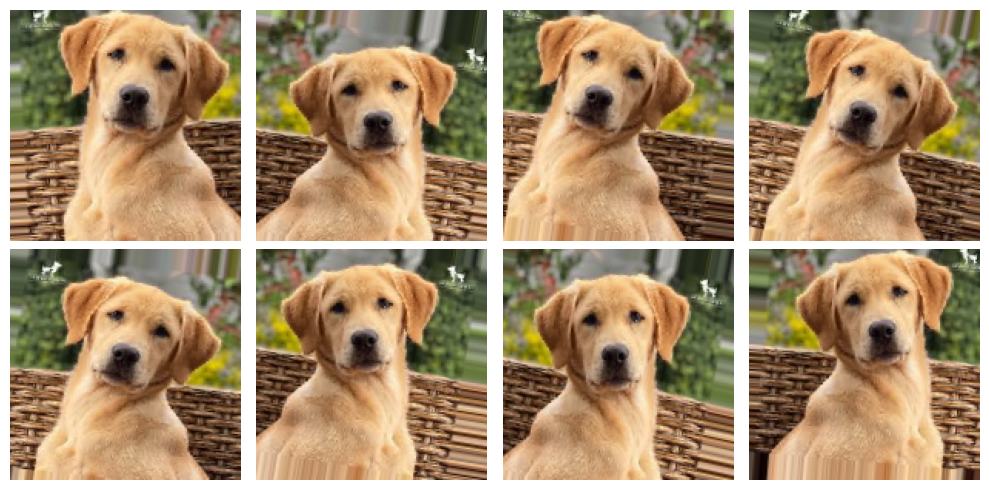

In [5]:
show_augmented(mild_datagen, img_path, rows=2, cols=4, save_examples=True, save_dir=generated_dir, prefix='mild')

#### Moderate augmentation

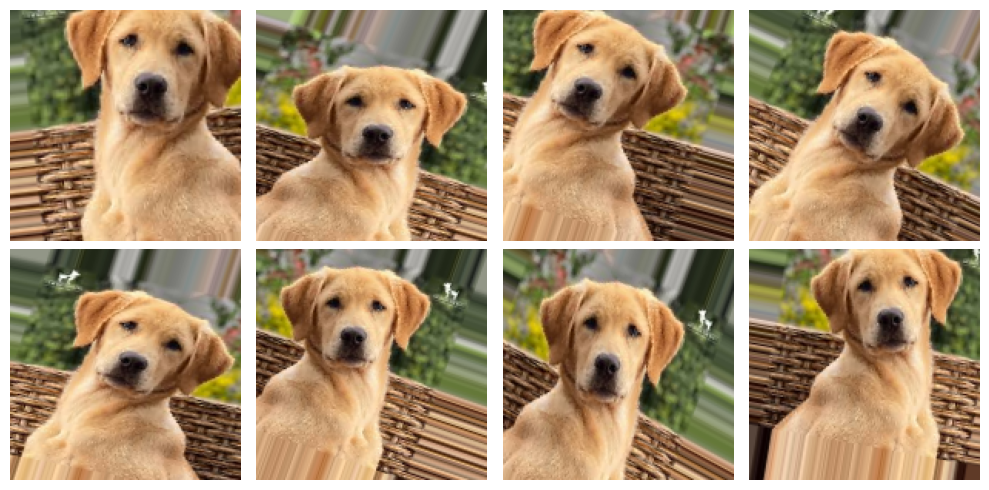

In [6]:
show_augmented(moderate_datagen, img_path, rows=2, cols=4, save_examples=True, save_dir=generated_dir, prefix='moderate')

#### Aggressive augmentation (may distort faces)

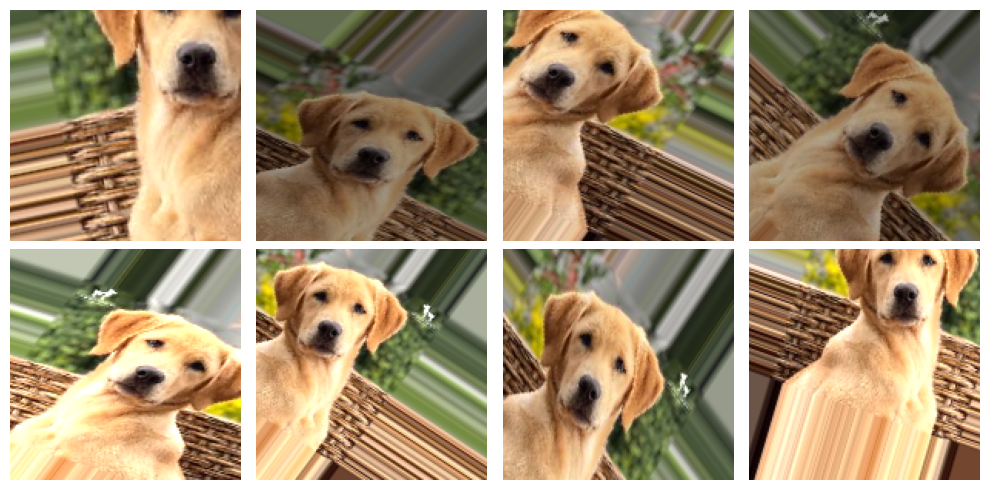

In [7]:
show_augmented(aggressive_datagen, img_path, rows=2, cols=4, save_examples=True, save_dir=generated_dir, prefix='aggressive')

# ➤ saved examples count: 12


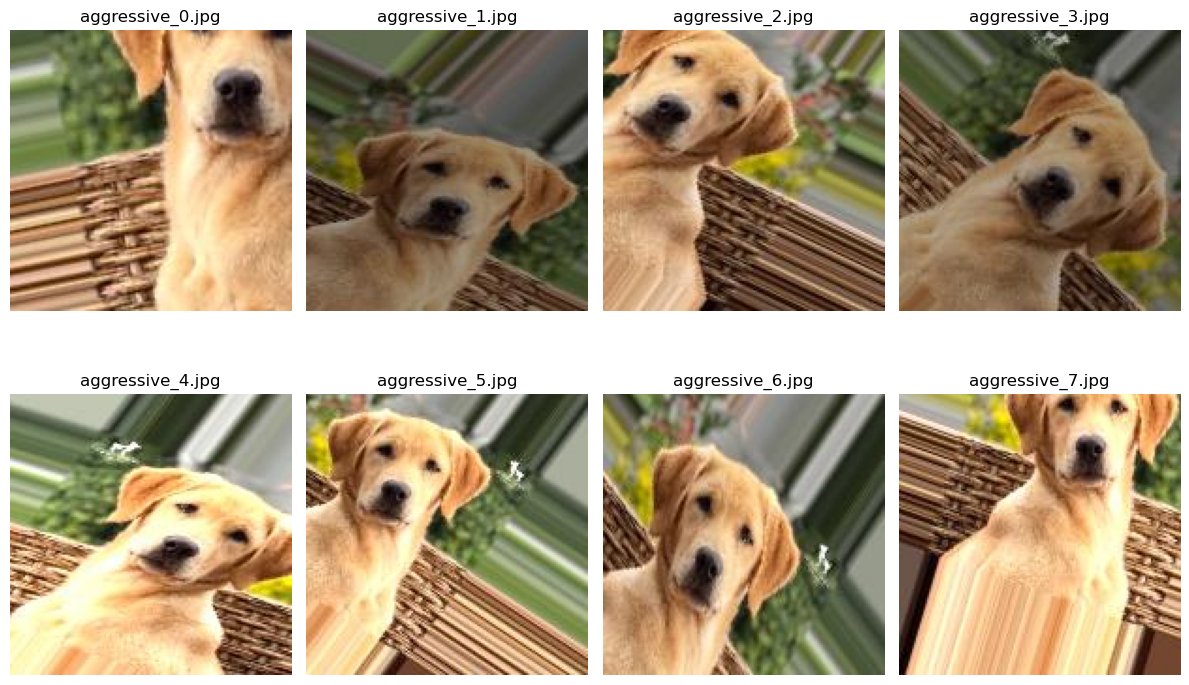

In [8]:
# 7️⃣ Show a few saved augmented images from generated_samples/
saved = sorted([f for f in os.listdir(generated_dir) if f.lower().endswith('.jpg')])[:12]
print(f'# ➤ saved examples count: {len(saved)}')
plt.figure(figsize=(12,8))
for i, fname in enumerate(saved[:8]):
    img = load_img(os.path.join(generated_dir, fname))
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 8️⃣ Best Practice: Use On-the-fly Augmentation during Training

**Why on-the-fly?**
- No extra disk storage required.
- New random transforms every epoch (more variability).
- Works well with `model.fit()` via `flow_from_directory()`.

Example usage in training:
```python
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'training',
    target_size=(64,64),
    batch_size=8,
    class_mode='binary'
)
```
Use `validation_split` or a separate `validation` folder for validation data.

### 9️⃣ Reproducibility & Tips

- For reproducible augmentation samples use a fixed `seed` in `flow()` or `flow_from_directory()`.  
- When saving augmented images for inspection, keep the count small (10–50) to avoid clutter.  
- For face/emotion datasets, keep transforms mild — aggressive transforms can distort expressions.  
- Always **rescale** (e.g., `rescale=1./255`) when feeding images into a neural network for training.


In [9]:
# 10️⃣ Diagnostic checks you can run during training
# Example snippet (not executed here):
# print('Train samples:', train_generator.samples)
# print('Validation samples:', val_generator.samples)
# print('Class indices:', train_generator.class_indices)

print('# ➤ Diagnostic examples shown in markdown above. Use these with your training generator when needed.')

# ➤ Diagnostic examples shown in markdown above. Use these with your training generator when needed.


### ✅ Summary & Next Steps

- We created three augmentation pipelines (mild, moderate, aggressive) and visualized their effects on a sample image.  
- **Recommendation:** Use mild-to-moderate augmentation for face/emotion tasks and apply augmentation on-the-fly during training.  
- **Next notebook:** Transfer Learning with MobileNetV2 (`08_Happy_Sad_Transfer_Learning.ipynb`) — combine augmentation + pretrained features for best results.

---  
**Saved sample images:** check `generated_samples/` for a few examples generated during this session.
